In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
HOME = os.getcwd()
print(HOME)

# Install necessary libraries
!pip install ultralytics==8.0.196
!pip install roboflow --quiet
!pip install inference-sdk --quiet


/kaggle/working
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 17.5 MB/s eta 0:00:0000:01
Reason for being yanked: deprecated, use 4.8.0.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.3 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires sha

In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import shutil
import random
from IPython.display import display, Image

# Import the inference SDK
from inference_sdk import InferenceHTTPClient


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.5/8062.4 GB disk)


In [6]:
import os
import shutil

# Define local dataset paths
train_images = '/kaggle/input/yolovmawa/train1'
train_labels = '/kaggle/input/yolovmawa/train-output-labels'
val_images = '/kaggle/input/yolovmawa/valid1'
val_labels = '/kaggle/input/yolovmawa/output-labels'
test_images = '/kaggle/input/yolovmawa/test1'
test_labels = '/kaggle/input/yolovmawa/testpost/output'

# Create the datasets directory in a writable location
writable_datasets_dir = os.path.join('/kaggle/working', 'datasets')
os.makedirs(writable_datasets_dir, exist_ok=True)

# Define writable paths for images and labels
writable_train_images = os.path.join(writable_datasets_dir, 'train/images')
writable_train_labels = os.path.join(writable_datasets_dir, 'train/labels')
writable_val_images = os.path.join(writable_datasets_dir, 'valid/images')
writable_val_labels = os.path.join(writable_datasets_dir, 'valid/labels')
writable_test_images = os.path.join(writable_datasets_dir, 'test/images')
writable_test_labels = os.path.join(writable_datasets_dir, 'test/labels')

# Create writable directories
os.makedirs(writable_train_images, exist_ok=True)
os.makedirs(writable_train_labels, exist_ok=True)
os.makedirs(writable_val_images, exist_ok=True)
os.makedirs(writable_val_labels, exist_ok=True)
os.makedirs(writable_test_images, exist_ok=True)
os.makedirs(writable_test_labels, exist_ok=True)

# Define data.yaml for YOLOv8
data_yaml_content = f"""
train: {writable_train_images}
val: {writable_val_images}
test: {writable_test_images}

# Define the number of classes
nc: 1  # update this based on your actual number of classes

# Class names
names: ['class']  # update this with actual class names
"""

# Save data.yaml
data_yaml_path = os.path.join(writable_datasets_dir, 'data.yaml')
with open(data_yaml_path, 'w') as f:
    f.write(data_yaml_content)

# Copy images and labels to writable directories
for label_file in os.listdir(train_labels):
    shutil.copy(os.path.join(train_labels, label_file), writable_train_labels)
    corresponding_image = label_file.replace('.txt', '.jpg')  # assuming image extension is .jpg
    shutil.copy(os.path.join(train_images, corresponding_image), writable_train_images)

for label_file in os.listdir(val_labels):
    shutil.copy(os.path.join(val_labels, label_file), writable_val_labels)
    corresponding_image = label_file.replace('.txt', '.jpg')  # assuming image extension is .jpg
    shutil.copy(os.path.join(val_images, corresponding_image), writable_val_images)

for label_file in os.listdir(test_labels):
    shutil.copy(os.path.join(test_labels, label_file), writable_test_labels)
    corresponding_image = label_file.replace('.txt', '.jpg')  # assuming image extension is .jpg
    shutil.copy(os.path.join(test_images, corresponding_image), writable_test_images)


In [7]:
# Initialize the YOLOv8 model
model = YOLO(f'{HOME}/yolov8n.pt')

# Training the model
!yolo task=detect mode=train model=yolov8s.pt data={data_yaml_path} epochs=50 imgsz=800 plots=True


100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]


100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 212MB/s]
New https://pypi.org/project/ultralytics/8.2.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_

In [11]:
import os

# Define HOME if not already defined
HOME = os.getcwd()

# Update this path with the correct located weights file
weights_path = os.path.join(HOME, 'runs/detect/train/weights/best.pt')  # Use the correct path for your weights

# Validate the trained model using the found weights file
!yolo task=detect mode=val model={weights_path} data={data_yaml_path}


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/valid/labels.cache... 450 images, 0 backg
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        450        450      0.956      0.956      0.971      0.754
Speed: 0.5ms preprocess, 12.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
import os

# Define HOME if not already defined
HOME = os.getcwd()

# List the contents of the runs directory to find where the weights might be saved
runs_dir = os.path.join(HOME, 'runs')
for root, dirs, files in os.walk(runs_dir):
    level = root.replace(runs_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


runs/
    detect/
        train/
            train_batch1.jpg
            train_batch0.jpg
            train_batch5281.jpg
            results.csv
            confusion_matrix.png
            train_batch2.jpg
            labels.jpg
            train_batch5280.jpg
            labels_correlogram.jpg
            events.out.tfevents.1718195584.0afb0bf88447.129.0
            F1_curve.png
            P_curve.png
            val_batch1_pred.jpg
            val_batch0_labels.jpg
            args.yaml
            confusion_matrix_normalized.png
            val_batch0_pred.jpg
            R_curve.png
            results.png
            train_batch5282.jpg
            PR_curve.png
            val_batch2_labels.jpg
            val_batch1_labels.jpg
            val_batch2_pred.jpg
            weights/
                best.pt
                last.pt
        val/
            confusion_matrix.png
            F1_curve.png
            P_curve.png
            val_batch1_pred.jpg
            val_batch0_la

In [13]:
import os

# Define HOME if not already defined
HOME = os.getcwd()

# Update this path with the located weights file
weights_path = os.path.join(HOME, 'runs/detect/train/weights/best.pt')  # Use the correct path for your weights

# Validate the trained model using the found weights file
!yolo task=detect mode=val model={weights_path} data={data_yaml_path}


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/valid/labels.cache... 450 images, 0 backg
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        450        450      0.956      0.956      0.971      0.754
Speed: 0.5ms preprocess, 12.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
# Predict on test images
!yolo task=detect mode=predict model={weights_path} conf=0.25 source={test_images} save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/448 /kaggle/input/yolovmawa/test1/IMG_20240513_220828_531_jpg.rf.aaac96ac87ab82fd93bec2450ba5f36a.jpg: 800x608 1 class, 67.7ms
image 2/448 /kaggle/input/yolovmawa/test1/IMG_20240513_220828_903_jpg.rf.916ca06c3c09c6997c57cb9d7ccc1716.jpg: 800x608 1 class, 19.6ms
image 3/448 /kaggle/input/yolovmawa/test1/IMG_20240513_220829_134_jpg.rf.50233610deb24895e5e65ea3e26dbbd3.jpg: 800x800 1 class, 23.0ms
image 4/448 /kaggle/input/yolovmawa/test1/IMG_20240513_220829_159_jpg.rf.e75e06a80bf01f14e380da48ab409140.jpg: 800x800 1 class, 22.4ms
image 5/448 /kaggle/input/yolovmawa/test1/IMG_20240513_220829_230_jpg.rf.4f2125c16bc239a09312d45db46b3156.jpg: 800x544 1 class, 77.6ms
image 6/448 /kaggle/input/yolovmawa/test1/IMG_20240513_220829_290_jpg.rf.e4fc7e7ea026ca1c900fbd77335c1e09.jpg: 800x544 

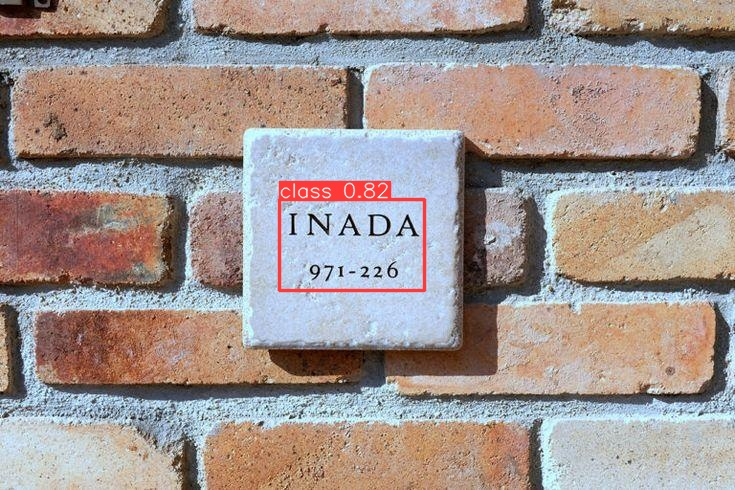

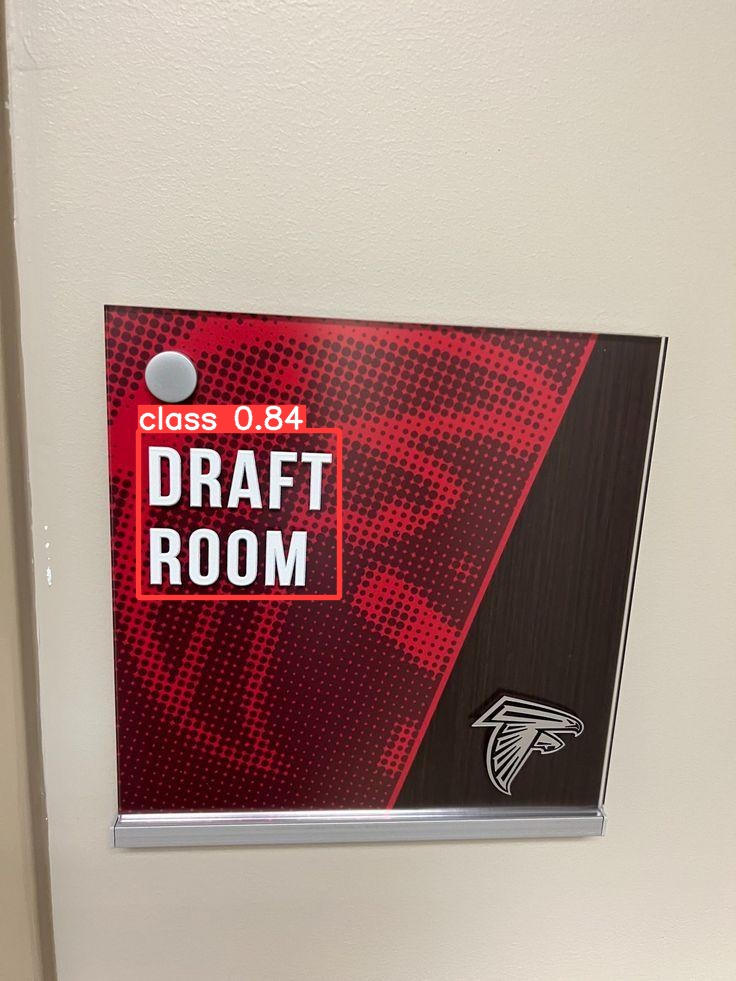

In [23]:
import os

# Define HOME if not already defined
HOME = os.getcwd()

# Path to the best weights file from the most recent training run
weights_path = os.path.join(HOME, 'runs/detect/train5/weights/best.pt')

# Predict on test images and suppress output
!yolo task=detect mode=predict model={weights_path} conf=0.25 source={test_images} save=True > /dev/null 2>&1

# Display a few predicted images
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:2]:
    display(Image(filename=image_path, width=600))
    print("\n")


In [16]:
!yolo task=detect mode=val model={weights_path} data={data_yaml_path} split=test save_json=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/test/labels... 448 images, 0 backgrounds,
val: New cache created: /kaggle/working/datasets/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        448        448      0.949      0.908       0.96      0.725
Speed: 0.6ms preprocess, 12.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Saving runs/detect/val3/predictions.json...
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val
